# Assignment: Multiple Linear Regression
## Car Price Case Study 

#### Problem Statement:

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

<ul>
<li>Which variables are significant in predicting the price of a car</li>
<li>How well those variables describe the price of a car</li>
</ul>

## Business Goal
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.Model the price of cars with the available independent variables. So that it can be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. This model will help management to understand the pricing dynamics of a new market. 


### List of variables Available

#### Categorical (11)
<ul>    
    <li> Symboling: 			Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical) 		</li>
    <li>carCompany:			Name of car company (Categorical) : to be separated </li> 
    <li>fueltype:			Car fuel type i.e gas or diesel (Categorical)</li>		
    <li>aspiration:			Aspiration used in a car (Categorical)		</li>
    <li>doornumber:			Number of doors in a car (Categorical)		</li>
    <li>carbody:			body of car (Categorical)		</li>
    <li>drivewheel:			type of drive wheel (Categorical)</li>		
    <li> enginelocation:			Location of car engine (Categorical)</li>		
<li> enginetype			Type of engine. (Categorical)		</li> 
<li> cylindernumber			cylinder placed in the car (Categorical)		</li> 
<li> fuelsystem			Fuel system of car (Categorical)		</li> 
</ul>

#### Numerical (14)
<ul>
    <li>wheelbase			Weelbase of car (Numeric)	</li>	
    <li>carlength			Length of car (Numeric)		</li>
    <li>carwidth			Width of car (Numeric)		</li>
    <li>carheight			height of car (Numeric)		</li>
    <li>curbweight			The weight of a car without occupants or baggage. (Numeric)		</li>
    <li>enginesize			Size of car (Numeric)		</li>
    <li>boreratio			Boreratio of car (Numeric)	</li>	
    <li>stroke			Stroke or volume inside the engine (Numeric)	</li>	
    <li>compressionratio			compression ratio of car (Numeric)	</li>	
    <li>horsepower			Horsepower (Numeric)		</li>
        <li>peakrpm			car peak rpm (Numeric)		</li>
    <li>citympg			Mileage in city (Numeric)		</li>
    <li>highwaympg			Mileage on highway (Numeric)	</li>	
    <li>price(Dependent variable)			Price of car (Numeric)	</li>	
</ul>



### Step 1: Reading and Understanding the Data
Let us first import NumPy and Pandas and read the housing dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings

warnings.filterwarnings('ignore')

In [163]:
carprice = pd.read_csv("CarPrice_Assignment.csv")
carprice.head()

car_ID  symboling                   CarName fueltype aspiration doornumber      carbody drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price
0       1          3        alfa-romero giulia      gas        std        two  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47    2.68               9.0         111     5000       21          27  13495.0
1       2          3       alfa-romero stelvio      gas        std        two  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47    2.68               9.0         111     5000       21          27  16500.0
2       3          1  alfa-romero Quadrifoglio      gas        std        two    hatchback        rwd          front       94.5      171.2      65.5       52.4        2823       ohcv            six         152       mpfi       2.68    3.47               9.0         154     5000       19          26  16500.0
3       4          2               audi 100 ls      gas        std       four        sedan        fwd          front       99.8      176.6      66.2       54.3        2337        ohc           four         109       mpfi       3.19    3.40              10.0         102     5500       24          30  13950.0
4       5          2                audi 100ls      gas        std       four        sedan        4wd          front       99.4      176.6      66.4       54.3        2824        ohc           five         136       mpfi       3.19    3.40               8.0         115     5500       18          22  17450.0

In [97]:
carprice.shape
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

Observations: All 26 columns have all 205 values. So there are no missing values. 

In [98]:
carprice.describe(include='all')

car_ID   symboling        CarName fueltype aspiration doornumber carbody drivewheel enginelocation   wheelbase   carlength    carwidth   carheight   curbweight enginetype cylindernumber  enginesize fuelsystem   boreratio      stroke  compressionratio  horsepower      peakrpm     citympg  highwaympg         price
count   205.000000  205.000000            205      205        205        205     205        205            205  205.000000  205.000000  205.000000  205.000000   205.000000        205            205  205.000000        205  205.000000  205.000000        205.000000  205.000000   205.000000  205.000000  205.000000    205.000000
unique         NaN         NaN            147        2          2          2       5          3              2         NaN         NaN         NaN         NaN          NaN          7              7         NaN          8         NaN         NaN               NaN         NaN          NaN         NaN         NaN           NaN
top            NaN         NaN  toyota corona      gas        std       four   sedan        fwd          front         NaN         NaN         NaN         NaN          NaN        ohc           four         NaN       mpfi         NaN         NaN               NaN         NaN          NaN         NaN         NaN           NaN
freq           NaN         NaN              6      185        168        115      96        120            202         NaN         NaN         NaN         NaN          NaN        148            159         NaN         94         NaN         NaN               NaN         NaN          NaN         NaN         NaN           NaN
mean    103.000000    0.834146            NaN      NaN        NaN        NaN     NaN        NaN            NaN   98.756585  174.049268   65.907805   53.724878  2555.565854        NaN            NaN  126.907317        NaN    3.329756    3.255415         10.142537  104.117073  5125.121951   25.219512   30.751220  13276.710571
std      59.322565    1.245307            NaN      NaN        NaN        NaN     NaN        NaN            NaN    6.021776   12.337289    2.145204    2.443522   520.680204        NaN            NaN   41.642693        NaN    0.270844    0.313597          3.972040   39.544167   476.985643    6.542142    6.886443   7988.852332
min       1.000000   -2.000000            NaN      NaN        NaN        NaN     NaN        NaN            NaN   86.600000  141.100000   60.300000   47.800000  1488.000000        NaN            NaN   61.000000        NaN    2.540000    2.070000          7.000000   48.000000  4150.000000   13.000000   16.000000   5118.000000
25%      52.000000    0.000000            NaN      NaN        NaN        NaN     NaN        NaN            NaN   94.500000  166.300000   64.100000   52.000000  2145.000000        NaN            NaN   97.000000        NaN    3.150000    3.110000          8.600000   70.000000  4800.000000   19.000000   25.000000   7788.000000
50%     103.000000    1.000000            NaN      NaN        NaN        NaN     NaN        NaN            NaN   97.000000  173.200000   65.500000   54.100000  2414.000000        NaN            NaN  120.000000        NaN    3.310000    3.290000          9.000000   95.000000  5200.000000   24.000000   30.000000  10295.000000
75%     154.000000    2.000000            NaN      NaN        NaN        NaN     NaN        NaN            NaN  102.400000  183.100000   66.900000   55.500000  2935.000000        NaN            NaN  141.000000        NaN    3.580000    3.410000          9.400000  116.000000  5500.000000   30.000000   34.000000  16503.000000
max     205.000000    3.000000            NaN      NaN        NaN        NaN     NaN        NaN            NaN  120.900000  208.100000   72.300000   59.800000  4066.000000        NaN            NaN  326.000000        NaN    3.940000    4.170000         23.000000  288.000000  6600.000000   49.000000   54.000000  45400.000000

## Step 2: Visualising the Data

- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

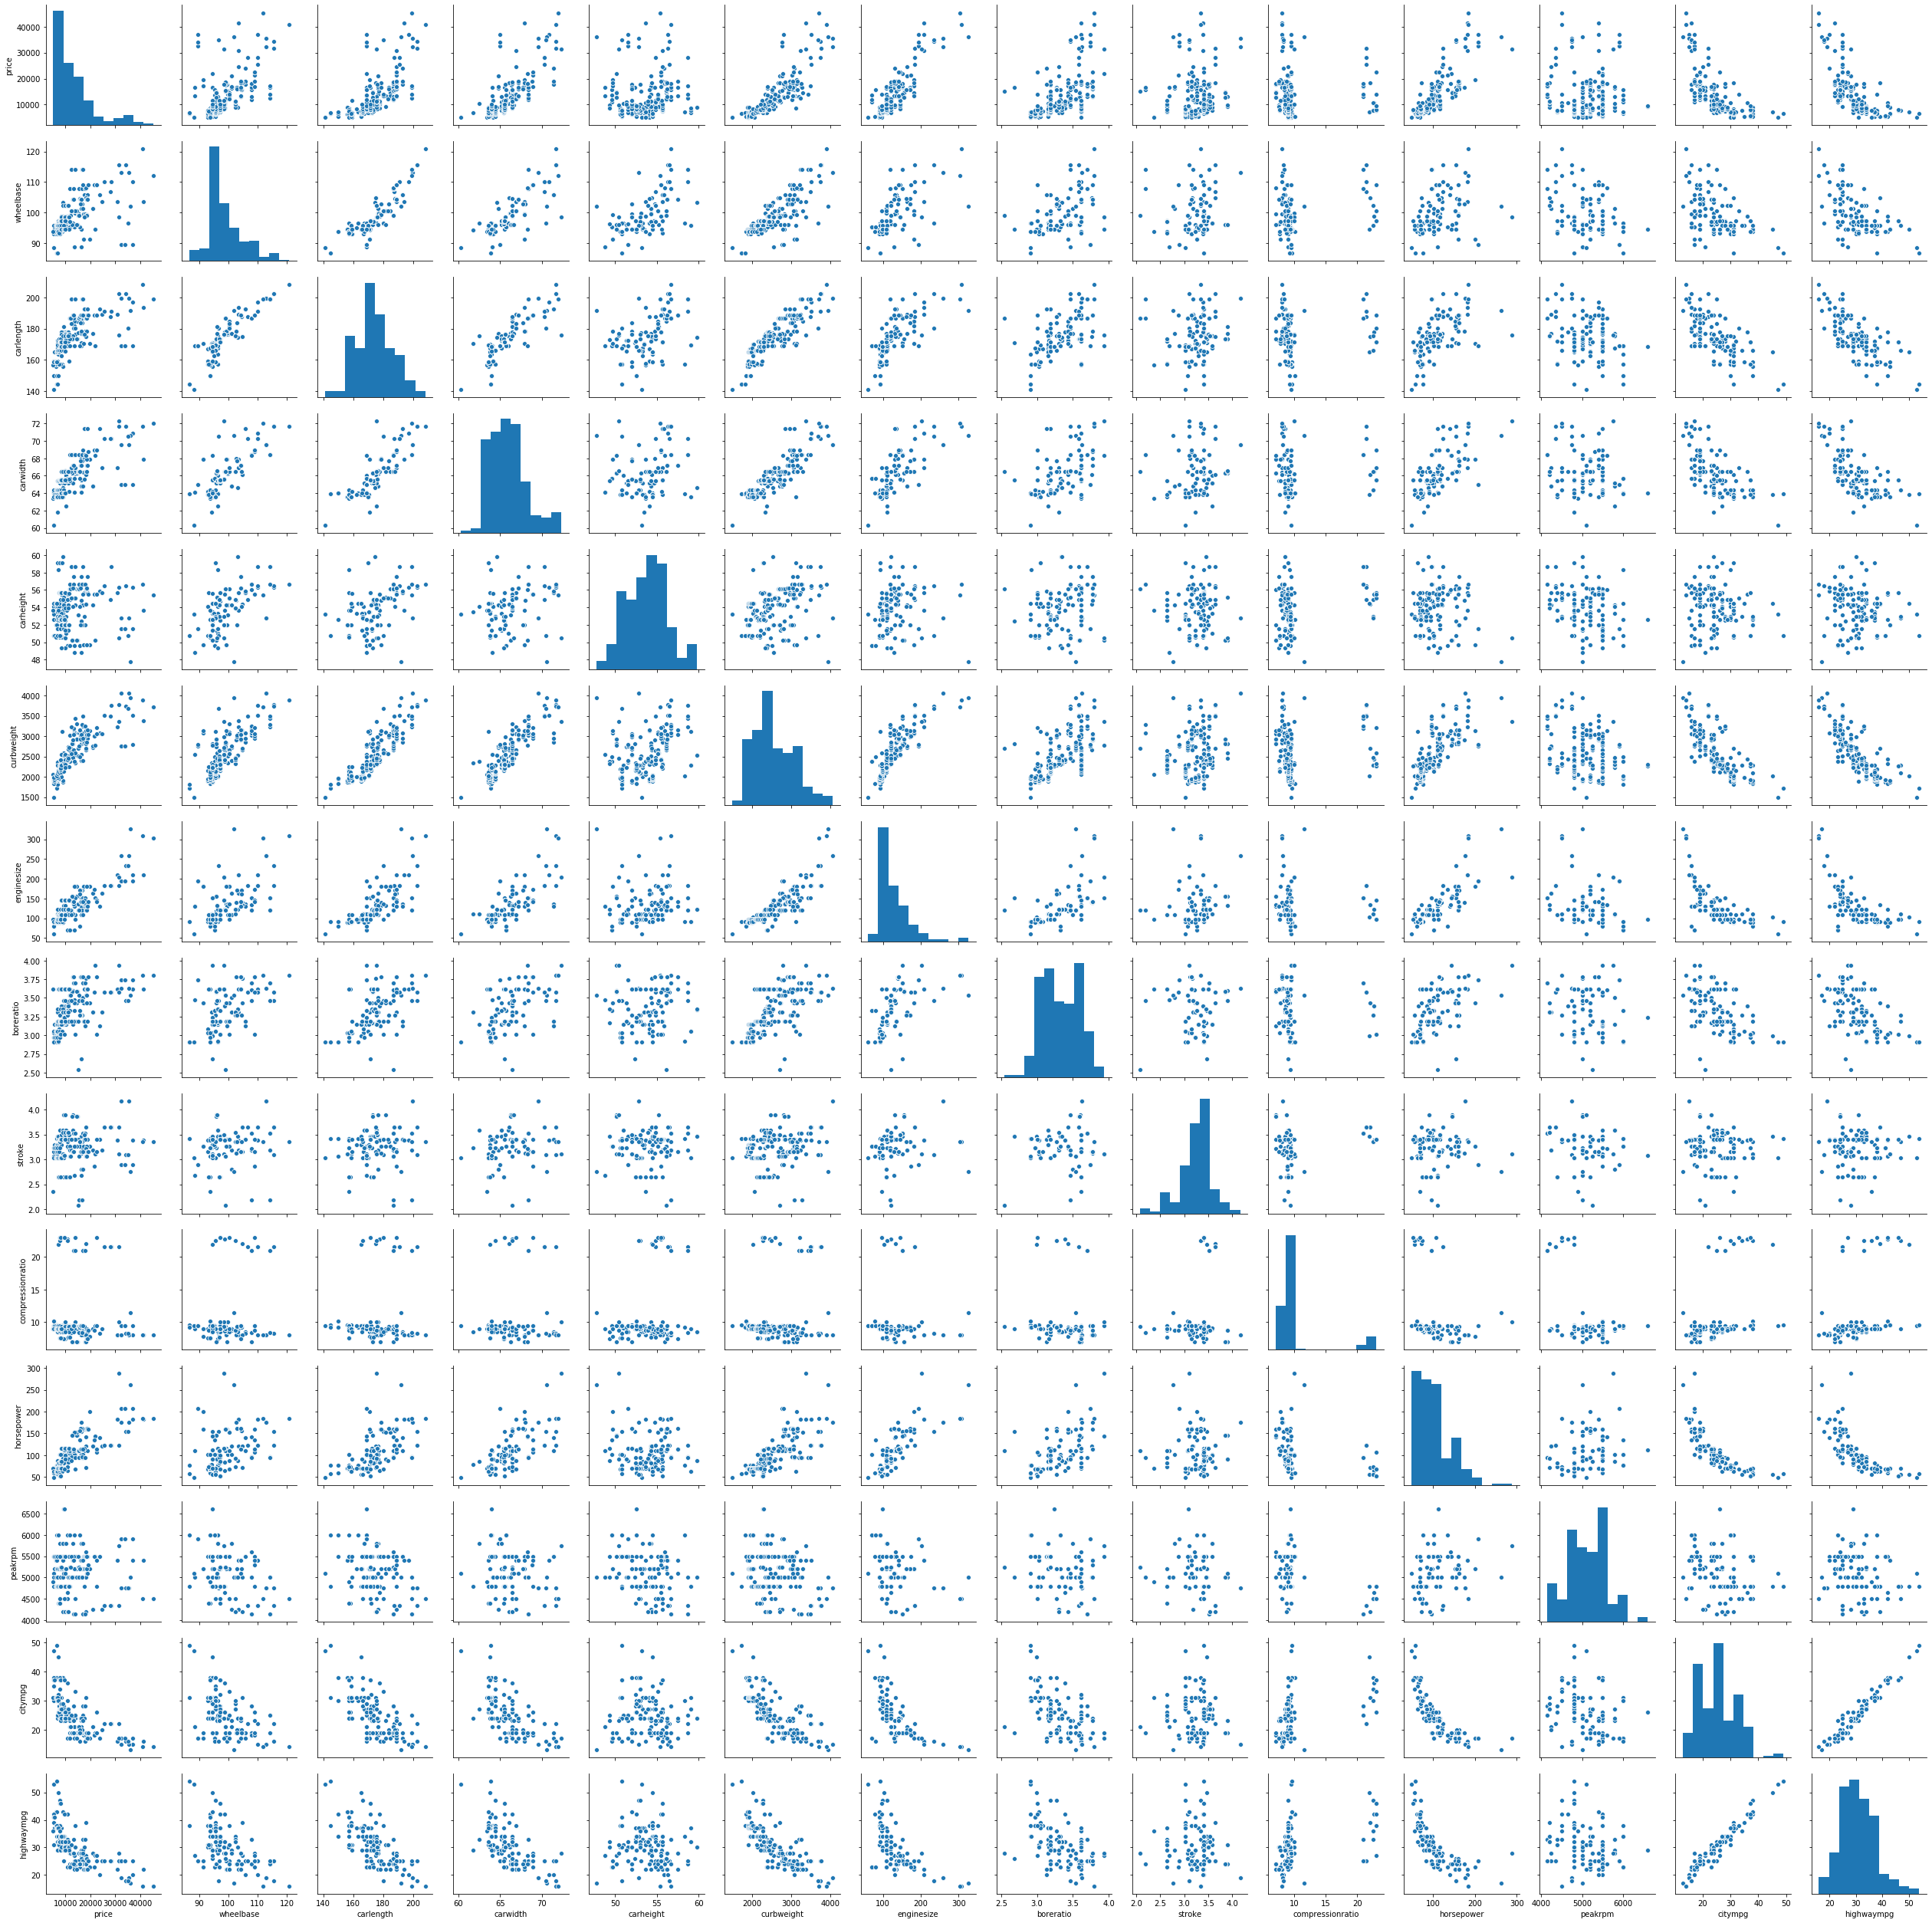

In [19]:
#visualize the numeric variables
#carprice.columns
list_of_columns = ['price', 'wheelbase',
                   'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber', 
                   'enginesize',  'boreratio', 'stroke',
                   'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'
                  ]
sns.pairplot(carprice[list_of_columns])
plt.show()

DATA indicates that following variables have linear influence on price: 
<ul>
    <li>wheelbase</li>
    <li>carlength</li>
    <li>carwidth</li>
    <li>carweight</li>
    <li>enginesize</li>
    <li>boreratio</li>
    <li>horsepower</li>
    <li>citympg -ve correlation as mpg increase price drops </li>
    <li>highwaympg -ve means as mpg increase price drops</li>
</ul>
<ul>
    <li>stroke: not that strong</li>
    <li>compressionratio</li>
    <li>carheight: not always strong</li>
    <li>peakrpm</li>
</ul>
reason behind citympg and highwaympg could be that these cars are smaller in size. hence there is a chance that these variables are highly correlated with other variables like enginesize etc. 
citympg and highwaympg themselves are highly correlated with each other. 
a linear relationship between these and other variables can also be observed. 
Lets do a correlation analysis in next step.


### before that lets visualize categorical elements

### observations 
too many values in carName. so this variable needs to be broken down as per requirement into car company and model. we will use only car company for analysis. 

In [164]:
carprice['carcompany'] = carprice['CarName'].str.split(expand=True)[0]
carprice['carcompany'].unique()
map_errors = {'Nissan': 'nissan', 'porcshce': 'porsche', 'toyouta': 'toyota' ,'vokswagen': 'volkswagen'
             ,'vw': 'volkswagen'
             }
print (map_errors.keys())
carprice['carcompany'] = carprice['carcompany'].apply(lambda x: map_errors[x] if x in map_errors.keys() else x)
carprice['carcompany'].unique()

dict_keys(['Nissan', 'porcshce', 'toyouta', 'vokswagen', 'vw'])


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'],
      dtype=object)

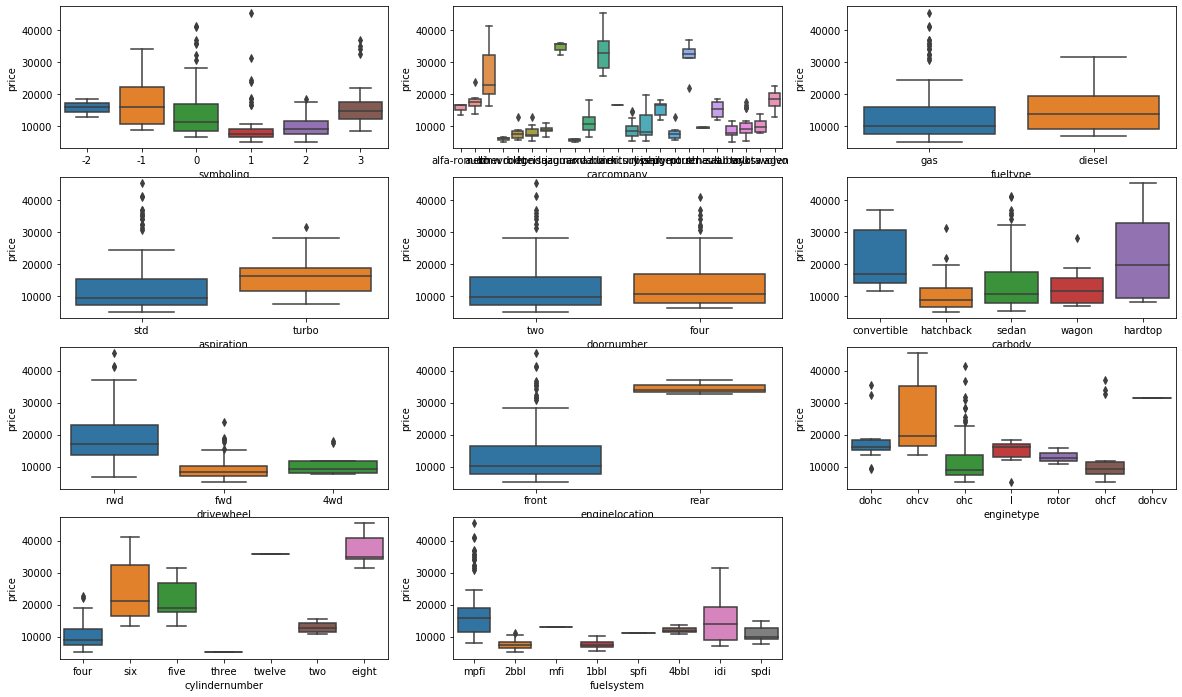

In [100]:
plt.figure(figsize=(20, 12))
plt.subplot(4,3,1)
sns.boxplot(x = 'symboling', y = 'price', data = carprice)
plt.subplot(4,3,2)
sns.boxplot(x = 'carcompany', y = 'price', data = carprice)
plt.subplot(4,3,3)
sns.boxplot(x = 'fueltype', y = 'price', data = carprice)
plt.subplot(4,3,4)
sns.boxplot(x = 'aspiration', y = 'price', data = carprice)
plt.subplot(4,3,5)
sns.boxplot(x = 'doornumber', y = 'price', data = carprice)
plt.subplot(4,3,6)
sns.boxplot(x = 'carbody', y = 'price', data = carprice)
plt.subplot(4,3,7)
sns.boxplot(x = 'drivewheel', y = 'price', data = carprice)
plt.subplot(4,3,8)
sns.boxplot(x = 'enginelocation', y = 'price', data = carprice)
plt.subplot(4,3,9)
sns.boxplot(x = 'enginetype', y = 'price', data = carprice)
plt.subplot(4,3,10)
sns.boxplot(x = 'cylindernumber', y = 'price', data = carprice)
plt.subplot(4,3,11)
sns.boxplot(x = 'fuelsystem', y = 'price', data = carprice)

plt.show()

In [102]:
# above graph shows relationships between categorical values and price. 
# doornumbers does not show difference because of values. so ideally this can be dropped. 
# enginelocation rear shows high value. 
# one thing that can be done here is in case certain combinations this company is not going to build at all 
# that data can be excluded but as of we do not have that information so we will keep all values and variables
#help(carprice.describe)
carprice.describe(exclude=np.number)

CarName fueltype aspiration doornumber carbody drivewheel enginelocation enginetype fuelsystem carcompany
count             205      205        205        205     205        205            205        205        205        205
unique            147        2          2          2       5          3              2          7          8         23
top     toyota corona      gas        std       four   sedan        fwd          front        ohc       mpfi     toyota
freq                6      185        168        115      96        120            202        148         94         32

In [165]:
#convert cylindernumber to digits 
varlist =  ['four', 'six', 'five', 'three', 'twelve', 'two', 'eight']
m = {'four':4, 
     'six': 6, 
     'five': 5, 
     'three': 3, 
     'twelve':12, 
     'two':2, 
     'eight':8
    }
# Applying the function to the housing list
carprice['cylindernumber'] = carprice['cylindernumber'].apply(lambda x: m[x])

### dummy variables 

In [166]:
# Let's drop the first column from status df using 'drop_first = True'
# not converting simboling to dummy since even though its categorical, these are ordered categorical values. 
# And i feel keeping these as numeric is fine. 

d1 = pd.get_dummies(carprice['fueltype'], drop_first = True)
#dummies1.head()
carprice = pd.concat([carprice, d1], axis = 1)
d1 = pd.get_dummies(carprice['aspiration'], drop_first = True)
#dummies1.head()
carprice = pd.concat([carprice, d1], axis = 1)
d1 = pd.get_dummies(carprice['doornumber'], drop_first = True)
#dummies1.head()
carprice = pd.concat([carprice, d1], axis = 1)
d1 = pd.get_dummies(carprice['carbody'], drop_first = True)
#dummies1.head()
carprice = pd.concat([carprice, d1], axis = 1)
d1 = pd.get_dummies(carprice['drivewheel'], drop_first = True)
#dummies1.head()
carprice = pd.concat([carprice, d1], axis = 1)
d1 = pd.get_dummies(carprice['enginelocation'], drop_first = True)
#dummies1.head()
carprice = pd.concat([carprice, d1], axis = 1)
d1 = pd.get_dummies(carprice['enginetype'], drop_first = True)
#dummies1.head()
carprice = pd.concat([carprice, d1], axis = 1)
d1 = pd.get_dummies(carprice['fuelsystem'], drop_first = True)
#dummies1.head()
carprice = pd.concat([carprice, d1], axis = 1)
d1 = pd.get_dummies(carprice['carcompany'], drop_first = True)
#dummies1.head()
carprice = pd.concat([carprice, d1], axis = 1)

In [110]:
#carprice.describe(exclude=np.number)
print(1)

1


In [167]:
#carprice.shape
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 10000)
carprice = carprice.drop(['car_ID', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation'  ], axis=1)
carprice = carprice.drop(['enginetype','fuelsystem','carcompany'], axis=1)


In [168]:
carprice.head()

symboling  wheelbase  carlength  carwidth  carheight  curbweight  cylindernumber  enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price  gas  turbo  two  hardtop  hatchback  sedan  wagon  fwd  rwd  rear  dohcv  l  ohc  ohcf  ohcv  rotor  2bbl  4bbl  idi  mfi  mpfi  spdi  spfi  audi  bmw  buick  chevrolet  dodge  honda  isuzu  jaguar  maxda  mazda  mercury  mitsubishi  nissan  peugeot  plymouth  porsche  renault  saab  subaru  toyota  volkswagen  volvo
0          3       88.6      168.8      64.1       48.8        2548               4         130       3.47    2.68               9.0         111     5000       21          27  13495.0    1      0    1        0          0      0      0    0    1     0      0  0    0     0     0      0     0     0    0    0     1     0     0     0    0      0          0      0      0      0       0      0      0        0           0       0        0         0        0        0     0       0       0           0      0
1          3       88.6      168.8      64.1       48.8        2548               4         130       3.47    2.68               9.0         111     5000       21          27  16500.0    1      0    1        0          0      0      0    0    1     0      0  0    0     0     0      0     0     0    0    0     1     0     0     0    0      0          0      0      0      0       0      0      0        0           0       0        0         0        0        0     0       0       0           0      0
2          1       94.5      171.2      65.5       52.4        2823               6         152       2.68    3.47               9.0         154     5000       19          26  16500.0    1      0    1        0          1      0      0    0    1     0      0  0    0     0     1      0     0     0    0    0     1     0     0     0    0      0          0      0      0      0       0      0      0        0           0       0        0         0        0        0     0       0       0           0      0
3          2       99.8      176.6      66.2       54.3        2337               4         109       3.19    3.40              10.0         102     5500       24          30  13950.0    1      0    0        0          0      1      0    1    0     0      0  0    1     0     0      0     0     0    0    0     1     0     0     1    0      0          0      0      0      0       0      0      0        0           0       0        0         0        0        0     0       0       0           0      0
4          2       99.4      176.6      66.4       54.3        2824               5         136       3.19    3.40               8.0         115     5500       18          22  17450.0    1      0    0        0          0      1      0    0    0     0      0  0    1     0     0      0     0     0    0    0     1     0     0     1    0      0          0      0      0      0       0      0      0        0           0       0        0         0        0        0     0       0       0           0      0

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [268]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(carprice, train_size = 0.7, test_size = 0.3, random_state = 100)

In [270]:
df_train.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'gas', 'turbo', 'two', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'rear', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'maxda', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype='object')

### Rescaling the Features 
We will be using Min-Max scaling for variables that are not binary and dummies. 

In [264]:
from sklearn.preprocessing import MinMaxScaler

In [265]:
scaler = MinMaxScaler()

In [266]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'curbweight','cylindernumber','carheight'
           ,'enginesize','boreratio','stroke','compressionratio','horsepower', 'peakrpm'
           ,'citympg','highwaympg','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [173]:
df_train.head()

symboling  wheelbase  carlength  carwidth  carheight  curbweight  cylindernumber  enginesize  boreratio    stroke  compressionratio  horsepower   peakrpm   citympg  highwaympg     price  gas  turbo  two  hardtop  hatchback  sedan  wagon  fwd  rwd  rear  dohcv  l  ohc  ohcf  ohcv  rotor  2bbl  4bbl  idi  mfi  mpfi  spdi  spfi  audi  bmw  buick  chevrolet  dodge  honda  isuzu  jaguar  maxda  mazda  mercury  mitsubishi  nissan  peugeot  plymouth  porsche  renault  saab  subaru  toyota  volkswagen  volvo
122        0.6   0.244828   0.426016  0.291667   0.265487    0.272692             0.2    0.139623   0.230159  0.525253           0.15000    0.083333  0.551020  0.500000    0.567568  0.068818    1      0    0        0          0      1      0    1    0     0      0  0    1     0     0      0     1     0    0    0     0     0     0     0    0      0          0      0      0      0       0      0      0        0           0       0        0         1        0        0     0       0       0           0      0
125        1.0   0.272414   0.452033  0.666667   0.212389    0.500388             0.2    0.339623   1.000000  0.464646           0.15625    0.395833  0.551020  0.166667    0.270270  0.466890    1      0    1        0          1      0      0    0    1     0      0  0    1     0     0      0     0     0    0    0     1     0     0     0    0      0          0      0      0      0       0      0      0        0           0       0        0         0        1        0     0       0       0           0      0
166        0.6   0.272414   0.448780  0.308333   0.424779    0.314973             0.2    0.139623   0.444444  0.449495           0.15000    0.266667  1.000000  0.361111    0.324324  0.122110    1      0    1        0          1      0      0    0    1     0      0  0    0     0     0      0     0     0    0    0     1     0     0     0    0      0          0      0      0      0       0      0      0        0           0       0        0         0        0        0     0       0       1           0      0
1          1.0   0.068966   0.450407  0.316667   0.088496    0.411171             0.2    0.260377   0.626984  0.247475           0.12500    0.262500  0.346939  0.222222    0.270270  0.314446    1      0    1        0          0      0      0    0    1     0      0  0    0     0     0      0     0     0    0    0     1     0     0     0    0      0          0      0      0      0       0      0      0        0           0       0        0         0        0        0     0       0       0           0      0
199        0.2   0.610345   0.775610  0.575000   0.858407    0.647401             0.2    0.260377   0.746032  0.484848           0.03125    0.475000  0.387755  0.111111    0.135135  0.382131    1      1    0        0          0      0      1    0    1     0      0  0    1     0     0      0     0     0    0    0     1     0     0     0    0      0          0      0      0      0       0      0      0        0           0       0        0         0        0        0     0       0       0           0      1

In [122]:
df_train.describe()

symboling   wheelbase   carlength    carwidth   carheight  curbweight  cylindernumber  enginesize   boreratio      stroke  compressionratio  horsepower     peakrpm     citympg  highwaympg       price         gas       turbo         two     hardtop   hatchback       sedan       wagon         fwd         rwd        rear       dohcv           l         ohc        ohcf        ohcv       rotor        2bbl        4bbl         idi    mfi        mpfi        spdi   spfi        audi         bmw       buick   chevrolet       dodge       honda       isuzu      jaguar       maxda       mazda  mercury  mitsubishi      nissan     peugeot    plymouth     porsche     renault        saab      subaru      toyota  volkswagen       volvo
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000      143.000000  143.000000  143.000000  143.000000        143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.0  143.000000  143.000000  143.0  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000    143.0  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000
mean     0.559441    0.411141    0.525476    0.461655    0.509004    0.407878        0.240559    0.241351    0.497946    0.535389          0.190787    0.227302    0.400029    0.344211    0.374976    0.219310    0.909091    0.181818    0.440559    0.020979    0.342657    0.475524    0.132867    0.594406    0.349650    0.006993    0.006993    0.062937    0.685315    0.083916    0.062937    0.027972    0.349650    0.020979    0.090909    0.0    0.440559    0.041958    0.0    0.034965    0.041958    0.034965    0.020979    0.041958    0.062937    0.020979    0.020979    0.013986    0.076923      0.0    0.062937    0.097902    0.055944    0.027972    0.020979    0.013986    0.020979    0.076923    0.139860    0.048951    0.041958
std      0.239200    0.205581    0.204848    0.184517    0.215378    0.211269        0.115818    0.154619    0.207140    0.157843          0.237181    0.165511    0.196438    0.186165    0.188477    0.215682    0.288490    0.387050    0.498199    0.143818    0.476266    0.501156    0.340624    0.492733    0.478536    0.083624    0.083624    0.243703    0.466023    0.278236    0.243703    0.165472    0.478536    0.143818    0.288490    0.0    0.498199    0.201198    0.0    0.184337    0.201198    0.184337    0.143818    0.201198    0.243703    0.143818    0.143818    0.117845    0.267406      0.0    0.243703    0.298227    0.230621    0.165472    0.143818    0.117845    0.143818    0.267406    0.348061    0.216524    0.201198
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000        0.000000    0.000000    0.000000    0.000000          0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.0    0.000000    0.000000    0.0    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000      0.0    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.400000    0.272414    0.399187    0.304167    0.353982    0.245539        0.200000    0.135849    0.305556    0.464646          0.100000    0.091667    0.265306    0.166667    0.216216    0.067298    1.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.

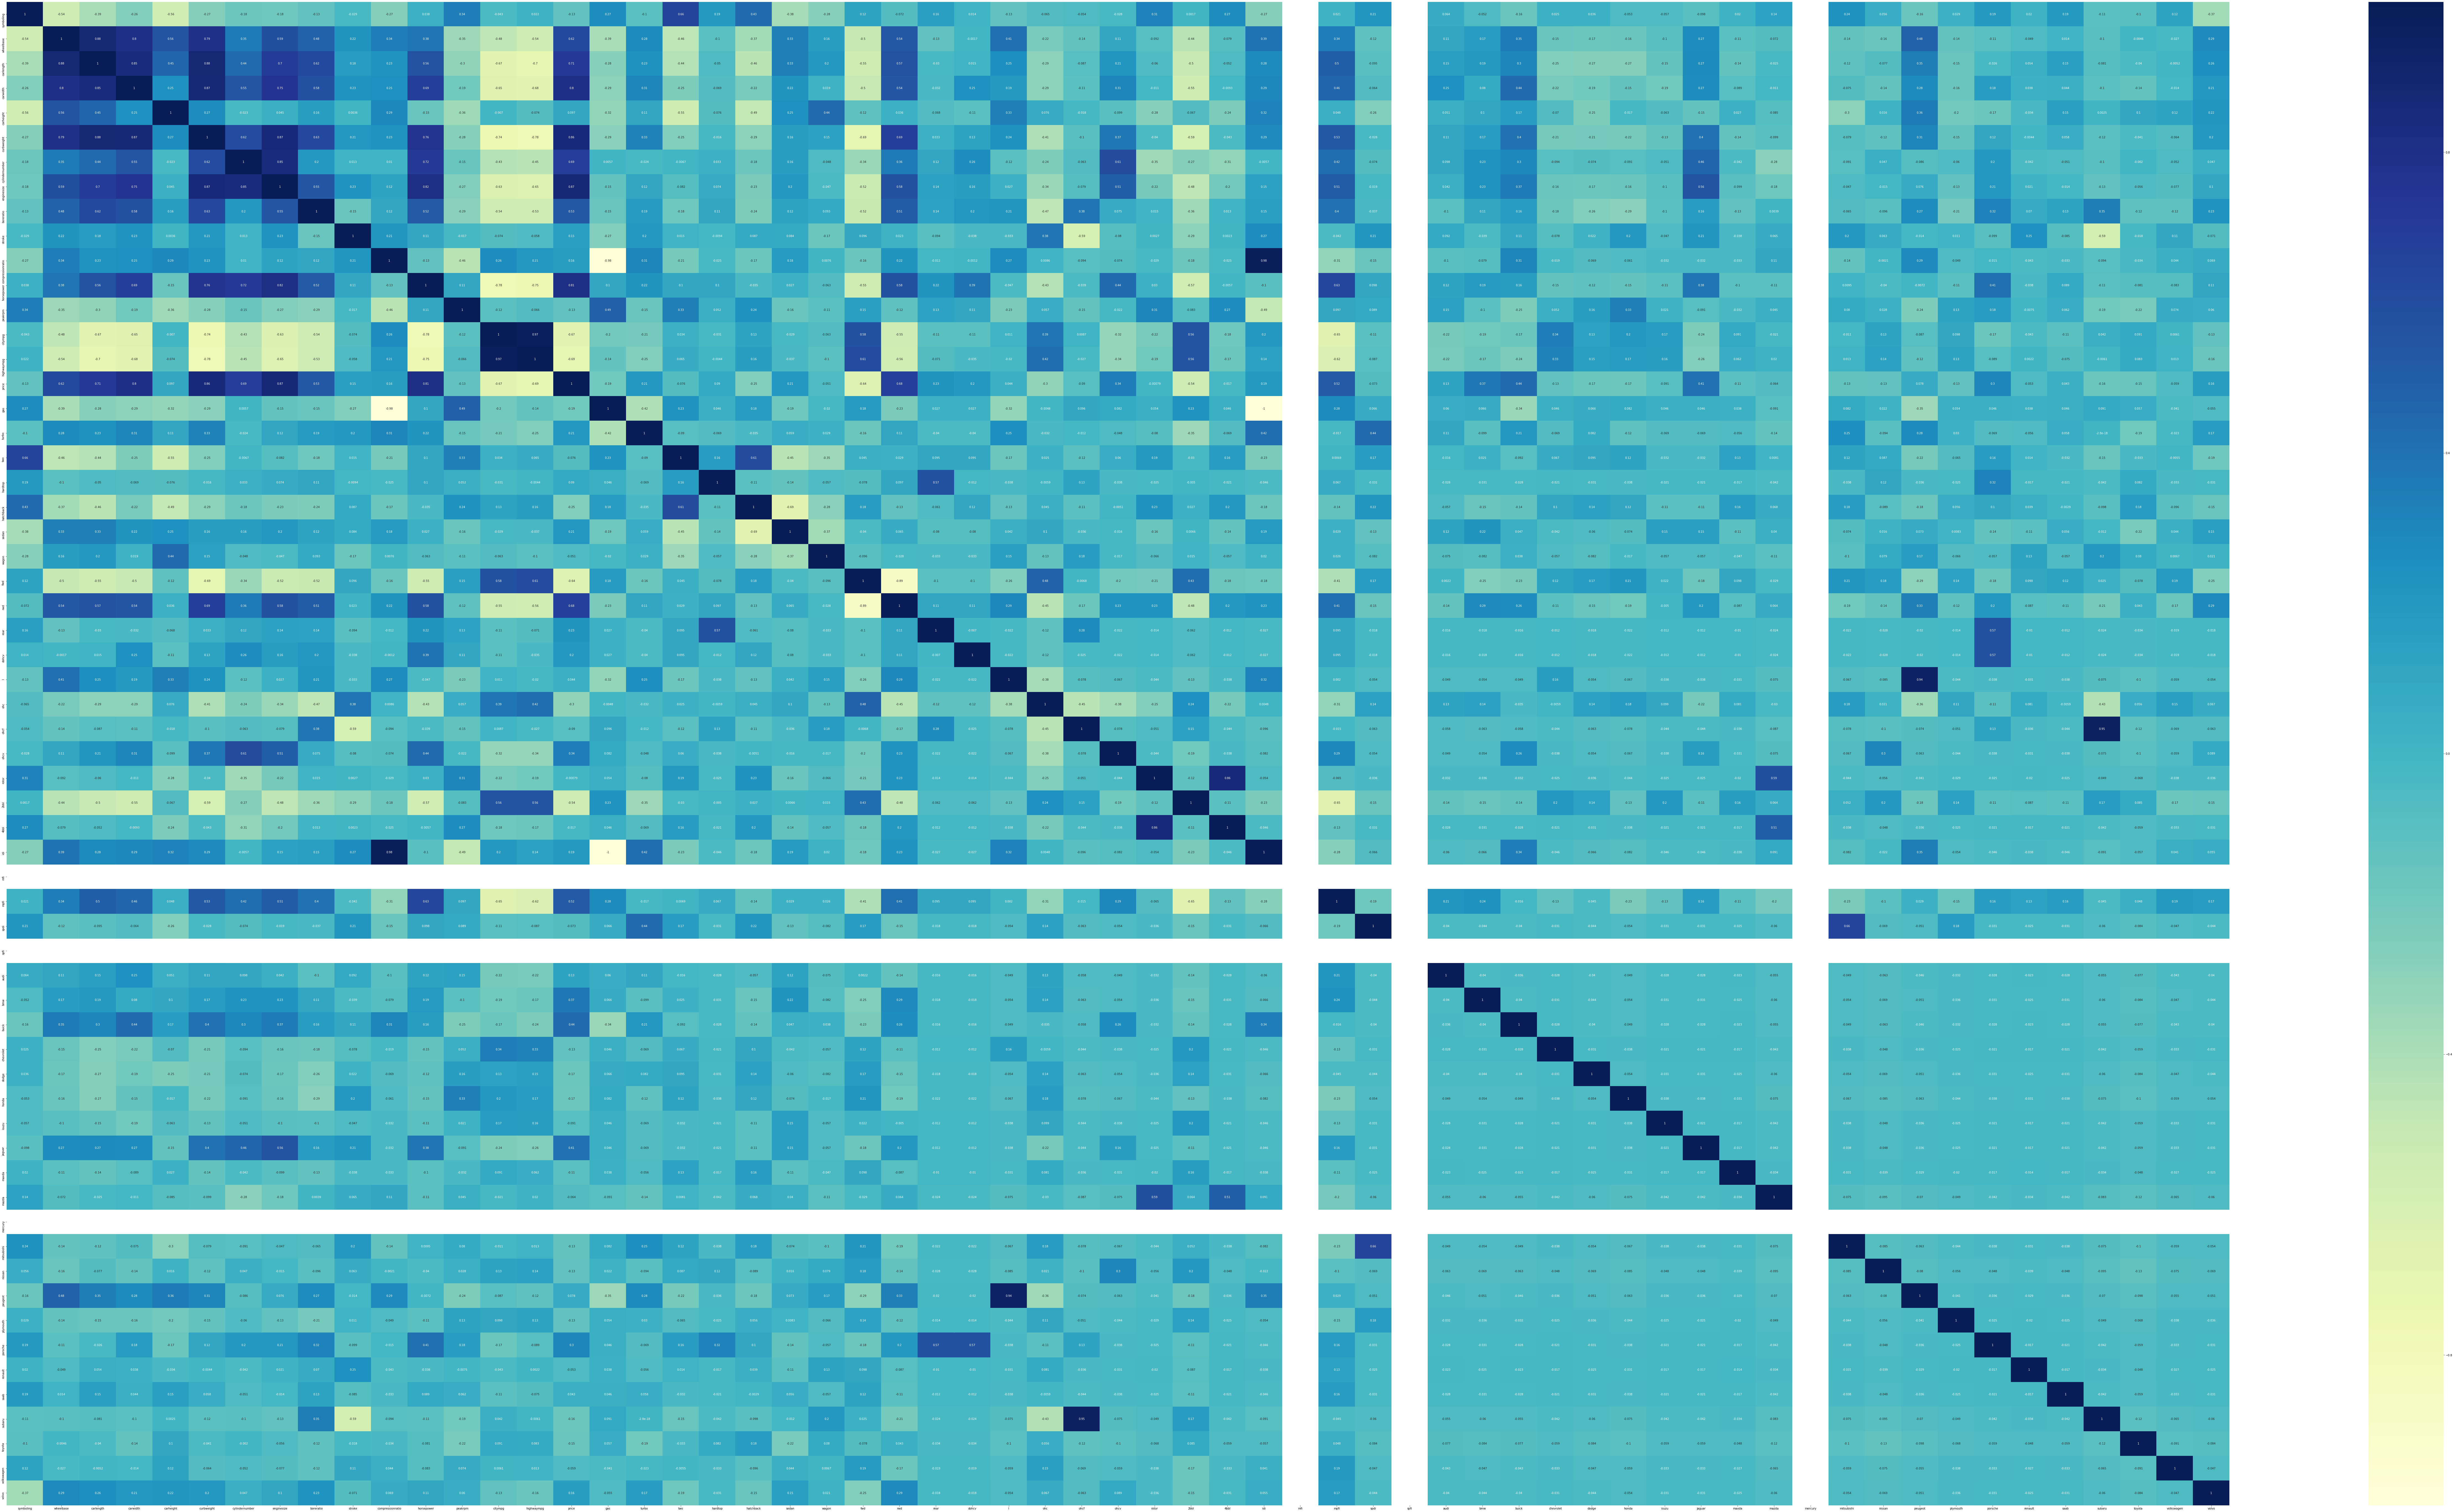

In [128]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (180, 100))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [174]:
y_train = df_train.pop('price')
X_train = df_train

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

we will start building a model with all the parameters included. though its too many but lets go this way. 

In [131]:
carprice.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'gas', 'turbo', 'two', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'rear', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'maxda', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype='object')

In [175]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.params

const               1.913862e-01
symboling          -1.174343e-02
wheelbase           2.172525e-01
carlength          -1.298698e-01
carwidth            2.533307e-01
carheight          -1.681377e-01
curbweight          2.680633e-01
cylindernumber     -5.747465e-01
enginesize          1.426098e+00
boreratio          -3.431212e-01
stroke             -1.557640e-01
compressionratio   -3.881182e-01
horsepower         -1.640152e-01
peakrpm             2.053308e-01
citympg             8.203446e-02
highwaympg          6.982452e-02
gas                -5.221929e-02
turbo               8.435739e-02
two                -8.322115e-03
hardtop            -1.198151e-01
hatchback          -1.340923e-01
sedan              -1.138195e-01
wagon              -9.421954e-02
fwd                -1.287970e-02
rwd                 1.029198e-02
rear                2.072642e-01
dohcv               2.009351e-01
l                   2.105313e-01
ohc                 5.940374e-02
ohcf                1.310063e-01
ohcv      

In [176]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     53.57
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           5.43e-49
Time:                        15:26:04   Log-Likelihood:                 270.89
No. Observations:                 143   AIC:                            -429.8
Df Residuals:                      87   BIC:                            -263.9
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1914      0.105  

### observations 
<ul>
    <li>R square is very high = .97 there are chances of overfit due to too many parameters </li>
    <li>however, adjusted R square is very good as well = .95  </li>
    <li>however, adjusted R square is very good as well = .95  </li>
    <li> some of the coefficients are very very low mercury, spfi, mfi. </li>
    <li> p value for some variables is too high : symboling, citympg, mazda most of the brand names </li>
</ul>

### Lets Check VIF Before we drop anything 

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [177]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
28              ohcf      inf
56            subaru      inf
24              rear      inf
15               gas  1086.20
33               idi   332.12
7         enginesize   239.14
10  compressionratio   233.63
6     cylindernumber    96.47
35              mpfi    66.58
11        horsepower    57.56
13           citympg    56.23
5         curbweight    53.52
14        highwaympg    50.81
31              2bbl    50.81
51           peugeot    41.01
8          boreratio    40.19
20             sedan    36.45
19         hatchback    29.20
2          carlength    28.92
1          wheelbase    26.72
43             honda    24.70
3           carwidth    24.62
57            toyota    23.91
21             wagon    19.53
26                 l    19.33
50            nissan    19.08
23               rwd    18.91
47             mazda    16.97
49        mitsubishi    16.23
27               ohc    14.19
59             volvo    14.04
40             buick    13.41
30             rotor    13.21
39               bmw    12.49
36              spdi    12.47
9             stroke    12.31
38              audi    11.55
58        volkswagen    10.72
42             dodge    10.39
22               fwd    10.33
53           porsche     9.99
32              4bbl     9.42
45            jaguar     9.34
16             turbo     9.05
4          carheight     9.01
52          plymouth     6.96
55              saab     6.92
12           peakrpm     6.90
41         chevrolet     6.81
25             dohcv     6.38
29              ohcv     6.06
44             isuzu     6.01
0          symboling     5.75
54           renault     5.48
18           hardtop     4.62
17               two     4.05
46             maxda     3.60
34               mfi      NaN
37              spfi      NaN
48           mercury      NaN

>we find many variables have VIF infinite. 
looking at the requirement one thing that is evident here is that carbrand is not going to be useful for the business. 
since this company is going launch its own brand. so i would first like to remove the dummy columns related to brand.
its based on both business need and their respective VIFs 


In [178]:
# Use RFE 
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 25)             # running RFE
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 27),
 ('wheelbase', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', False, 8),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', False, 3),
 ('peakrpm', True, 1),
 ('citympg', True, 1),
 ('highwaympg', False, 23),
 ('gas', True, 1),
 ('turbo', False, 5),
 ('two', False, 30),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 28),
 ('rwd', False, 29),
 ('rear', True, 1),
 ('dohcv', False, 4),
 ('l', True, 1),
 ('ohc', False, 11),
 ('ohcf', False, 2),
 ('ohcv', False, 33),
 ('rotor', True, 1),
 ('2bbl', False, 24),
 ('4bbl', False, 7),
 ('idi', True, 1),
 ('mfi', False, 36),
 ('mpfi', False, 32),
 ('spdi', False, 31),
 ('spfi', False, 34),
 ('audi', False, 17),
 ('bmw', True, 1),
 ('buick', False, 25),
 ('chevrolet', False, 12),
 ('dodge', False, 9),
 ('honda', 

### drop car brand 
understanding that this new company is not going to use any of the brand but will use actual features of the car, having this parameter does not make sense based on business condition. though this model does not say it very directly but we have too many variables just because of car brand. lets drop it and check if the model accuracy drops drastically. 

In [136]:
carprice.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'gas', 'turbo', 'two', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'rear', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'maxda', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype='object')

In [180]:
X = X_train.drop(['audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'maxda', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], axis=1)
#Build a linear model
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     40.03
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           4.56e-47
Time:                        15:33:29   Log-Likelihood:                 206.12
No. Observations:                 143   AIC:                            -340.2
Df Residuals:                     107   BIC:                            -233.6
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0336      0.117  

<b> with 22 variables dropping, R square has not dropped so much plus number of variables have drastically dropped to make analysis simple. Lets perform RFE analysis once again and check which are the bottom variables
</b>

In [182]:
# Use RFE 
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X, y_train)

rfe = RFE(lm, 30)             # running RFE
rfe = rfe.fit(X, y_train)

list(zip(X.columns,rfe.support_,rfe.ranking_))

[('symboling', True, 1),
 ('wheelbase', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', True, 1),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('citympg', True, 1),
 ('highwaympg', True, 1),
 ('gas', True, 1),
 ('turbo', True, 1),
 ('two', False, 7),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 5),
 ('rwd', True, 1),
 ('rear', True, 1),
 ('dohcv', True, 1),
 ('l', False, 6),
 ('ohc', True, 1),
 ('ohcf', True, 1),
 ('ohcv', True, 1),
 ('rotor', True, 1),
 ('2bbl', False, 4),
 ('4bbl', False, 2),
 ('idi', True, 1),
 ('mfi', False, 8),
 ('mpfi', False, 3),
 ('spdi', True, 1),
 ('spfi', False, 9)]

>mfi mpfi spfi these values come from fuelsystem. though car prices could be dependent upon these lets drop these and check how the model performs. their p value is also not great.  

In [183]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
15               gas  551.43
33               idi  202.40
10  compressionratio  127.54
7         enginesize  101.25
6     cylindernumber   42.91
14        highwaympg   42.77
5         curbweight   41.59
13           citympg   40.10
11        horsepower   29.67
20             sedan   25.45
19         hatchback   19.73
2          carlength   18.68
1          wheelbase   17.46
8          boreratio   15.36
21             wagon   13.28
3           carwidth   11.98
23               rwd   11.04
35              mpfi   10.21
22               fwd    9.32
28              ohcf    9.05
27               ohc    8.46
31              2bbl    7.54
30             rotor    7.00
9             stroke    6.81
16             turbo    5.17
32              4bbl    4.95
4          carheight    4.27
25             dohcv    4.25
26                 l    4.24
12           peakrpm    3.63
18           hardtop    3.61
29              ohcv    3.51
0          symboling    3.49
36              spdi    3.48
17               two    3.35
24              rear    2.60
34               mfi     NaN
37              spfi     NaN

In [188]:
X = X.drop(['mpfi','2bbl','mfi','4bbl'], axis=1)
#Build a linear model
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     44.85
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           1.85e-49
Time:                        15:44:13   Log-Likelihood:                 205.89
No. Observations:                 143   AIC:                            -345.8
Df Residuals:                     110   BIC:                            -248.0
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0453      0.113  

In [189]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
15               gas  500.53
31               idi  199.89
10  compressionratio  125.47
7         enginesize   94.31
14        highwaympg   41.69
5         curbweight   41.51
6     cylindernumber   41.44
13           citympg   39.13
11        horsepower   23.68
20             sedan   23.02
2          carlength   18.33
19         hatchback   17.86
1          wheelbase   16.24
8          boreratio   14.72
21             wagon   12.12
3           carwidth   11.72
23               rwd   10.82
22               fwd    9.27
28              ohcf    8.59
27               ohc    8.29
9             stroke    6.42
16             turbo    5.03
26                 l    4.11
4          carheight    3.95
25             dohcv    3.93
30             rotor    3.59
29              ohcv    3.46
18           hardtop    3.42
0          symboling    3.35
17               two    3.34
12           peakrpm    3.07
24              rear    2.51
32              spdi    2.01
33              spfi     NaN

<b> it can be noticed that there is no drop in R square. </b>

In [190]:
# Use RFE 
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X, y_train)

rfe = RFE(lm, 30)             # running RFE
rfe = rfe.fit(X, y_train)

list(zip(X.columns,rfe.support_,rfe.ranking_))

[('symboling', True, 1),
 ('wheelbase', True, 1),
 ('carlength', False, 3),
 ('carwidth', True, 1),
 ('carheight', True, 1),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('citympg', True, 1),
 ('highwaympg', True, 1),
 ('gas', True, 1),
 ('turbo', True, 1),
 ('two', False, 4),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', True, 1),
 ('rwd', True, 1),
 ('rear', True, 1),
 ('dohcv', True, 1),
 ('l', False, 2),
 ('ohc', True, 1),
 ('ohcf', True, 1),
 ('ohcv', True, 1),
 ('rotor', True, 1),
 ('idi', True, 1),
 ('spdi', True, 1),
 ('spfi', False, 5)]

>variables not supported by RFE 
('carlength', False, 3),
('two', False, 4),
('l', False, 2),
('spfi', False, 5)
R-squared:                       0.929
Adj. R-squared:                  0.908
p value 
spfi nan 
two .908
l 0.815      
lets drop spfi since that is part of fuelsystem anyways

In [195]:
X = X.drop(['spfi'], axis=1)
#Build a linear model
X_train_lm = sm.add_constant(X)
lr_4 = sm.OLS(y_train, X_train_lm).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     44.85
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           1.85e-49
Time:                        15:51:19   Log-Likelihood:                 205.89
No. Observations:                 143   AIC:                            -345.8
Df Residuals:                     110   BIC:                            -248.0
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0453      0.113  

No change in R and Rsquare .928 and .908 
p values > .5 = const fwd l 

In [196]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
15               gas  500.53
31               idi  199.89
10  compressionratio  125.47
7         enginesize   94.31
14        highwaympg   41.69
5         curbweight   41.51
6     cylindernumber   41.44
13           citympg   39.13
11        horsepower   23.68
20             sedan   23.02
2          carlength   18.33
19         hatchback   17.86
1          wheelbase   16.24
8          boreratio   14.72
21             wagon   12.12
3           carwidth   11.72
23               rwd   10.82
22               fwd    9.27
28              ohcf    8.59
27               ohc    8.29
9             stroke    6.42
16             turbo    5.03
26                 l    4.11
4          carheight    3.95
25             dohcv    3.93
30             rotor    3.59
29              ohcv    3.46
18           hardtop    3.42
0          symboling    3.35
17               two    3.34
12           peakrpm    3.07
24              rear    2.51
32              spdi    2.01

out of these fwd VIF is > 5. 
lets check what does RFE suggests

In [199]:
# Use RFE 
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X, y_train)

list(zip(X.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 6),
 ('wheelbase', True, 1),
 ('carlength', False, 13),
 ('carwidth', True, 1),
 ('carheight', False, 4),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', False, 3),
 ('citympg', False, 9),
 ('highwaympg', True, 1),
 ('gas', False, 2),
 ('turbo', False, 8),
 ('two', False, 14),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 11),
 ('rwd', False, 5),
 ('rear', True, 1),
 ('dohcv', True, 1),
 ('l', False, 12),
 ('ohc', True, 1),
 ('ohcf', True, 1),
 ('ohcv', False, 10),
 ('rotor', True, 1),
 ('idi', True, 1),
 ('spdi', False, 7)]

In [200]:
X = X.drop(['idi','highwaympg'], axis=1)
#Build a linear model
X_train_lm = sm.add_constant(X)
lr_5 = sm.OLS(y_train, X_train_lm).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     45.69
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           8.27e-50
Time:                        15:58:50   Log-Likelihood:                 204.40
No. Observations:                 143   AIC:                            -344.8
Df Residuals:                     111   BIC:                            -250.0
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2492      0.257  

In [201]:
X = X.drop(['two','fwd'], axis=1)
#Build a linear model
X_train_lm = sm.add_constant(X)
lr_5 = sm.OLS(y_train, X_train_lm).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     49.67
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           1.75e-51
Time:                        15:59:57   Log-Likelihood:                 204.34
No. Observations:                 143   AIC:                            -348.7
Df Residuals:                     113   BIC:                            -259.8
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2486      0.254  

In [202]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vifcarlength           

Features     VIF
14               gas  320.77
7         enginesize  308.78
6     cylindernumber  212.75
5         curbweight  147.84
2          carlength  137.50
8          boreratio   99.78
3           carwidth   81.94
1          wheelbase   75.32
9             stroke   67.63
11        horsepower   66.03
10  compressionratio   60.01
13           citympg   42.65
18             sedan   38.87
17         hatchback   25.11
4          carheight   24.48
24               ohc   23.28
0          symboling   17.06
12           peakrpm   14.80
19             wagon   12.58
25              ohcf    7.76
20               rwd    6.40
15             turbo    5.09
23                 l    3.88
22             dohcv    3.80
27             rotor    3.54
26              ohcv    3.35
16           hardtop    3.16
21              rear    2.41
28              spdi    2.00

though carlength is important variable but its VIF is high and p value is high. 
chances are calength is explained by all other variables. lets check model by removing it. 

In [203]:
X = X.drop(['carlength'], axis=1)
#Build a linear model
X_train_lm = sm.add_constant(X)
lr_5 = sm.OLS(y_train, X_train_lm).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     51.90
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           2.40e-52
Time:                        16:03:36   Log-Likelihood:                 204.33
No. Observations:                 143   AIC:                            -350.7
Df Residuals:                     114   BIC:                            -264.7
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2482      0.253  

In [205]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif           

Features     VIF
13               gas  312.26
6         enginesize  289.77
5     cylindernumber  210.73
4         curbweight  137.25
7          boreratio   91.73
2           carwidth   72.54
8             stroke   67.31
1          wheelbase   66.39
10        horsepower   64.47
9   compressionratio   57.88
12           citympg   39.51
17             sedan   36.74
16         hatchback   25.02
3          carheight   24.48
23               ohc   21.92
0          symboling   17.00
11           peakrpm   13.57
18             wagon   11.84
24              ohcf    6.73
19               rwd    6.22
14             turbo    4.57
22                 l    3.67
25              ohcv    3.26
26             rotor    3.26
21             dohcv    3.19
15           hardtop    3.13
20              rear    2.38
27              spdi    1.96

In [206]:
X = X.drop(['citympg'], axis=1)
#Build a linear model
X_train_lm = sm.add_constant(X)
lr_5 = sm.OLS(y_train, X_train_lm).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     52.04
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           2.96e-52
Time:                        16:07:19   Log-Likelihood:                 201.53
No. Observations:                 143   AIC:                            -347.1
Df Residuals:                     115   BIC:                            -264.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2910      0.256  

In [207]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif           

Features     VIF
6         enginesize  245.60
5     cylindernumber  189.80
12               gas  175.32
4         curbweight  111.34
7          boreratio   80.98
2           carwidth   72.21
8             stroke   64.36
1          wheelbase   64.24
10        horsepower   60.42
16             sedan   35.56
9   compressionratio   27.98
3          carheight   24.34
15         hatchback   23.91
22               ohc   21.85
0          symboling   16.55
11           peakrpm   13.50
17             wagon   11.43
23              ohcf    6.73
18               rwd    6.22
13             turbo    4.41
21                 l    3.50
24              ohcv    3.25
14           hardtop    3.06
20             dohcv    2.93
25             rotor    2.91
19              rear    2.34
26              spdi    1.96

In [208]:
X = X.drop(['curbweight'], axis=1)
#Build a linear model
X_train_lm = sm.add_constant(X)
lr_6 = sm.OLS(y_train, X_train_lm).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     54.49
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           4.03e-53
Time:                        16:08:51   Log-Likelihood:                 201.51
No. Observations:                 143   AIC:                            -349.0
Df Residuals:                     116   BIC:                            -269.0
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3022      0.249  

In [209]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif           

Features     VIF
5         enginesize  202.63
4     cylindernumber  177.57
11               gas  167.95
6          boreratio   78.91
2           carwidth   66.19
7             stroke   63.24
1          wheelbase   60.94
9         horsepower   57.11
15             sedan   34.92
8   compressionratio   26.73
14         hatchback   23.42
3          carheight   22.59
21               ohc   21.82
0          symboling   16.46
10           peakrpm   13.38
16             wagon   11.41
22              ohcf    6.73
17               rwd    5.98
12             turbo    4.10
20                 l    3.50
23              ohcv    3.25
13           hardtop    3.02
19             dohcv    2.93
24             rotor    2.87
18              rear    2.31
25              spdi    1.96

In [210]:
X = X.drop(['wheelbase'], axis=1)
#Build a linear model
X_train_lm = sm.add_constant(X)
lr_6 = sm.OLS(y_train, X_train_lm).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     56.80
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           7.38e-54
Time:                        16:10:44   Log-Likelihood:                 201.09
No. Observations:                 143   AIC:                            -350.2
Df Residuals:                     117   BIC:                            -273.1
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3332      0.245  

In [211]:
X = X.drop(['compressionratio'], axis=1)
#Build a linear model
X_train_lm = sm.add_constant(X)
lr_6 = sm.OLS(y_train, X_train_lm).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     59.19
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           1.45e-54
Time:                        16:11:08   Log-Likelihood:                 200.55
No. Observations:                 143   AIC:                            -351.1
Df Residuals:                     118   BIC:                            -277.0
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1230      0.098      1.

In [227]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif           

Features    VIF
1       stroke  27.19
6        sedan  14.22
0   enginesize  13.46
5    hatchback  10.64
11         ohc   8.23
2      peakrpm   6.10
7        wagon   4.35
8          rwd   4.17
12        ohcf   2.66
4      hardtop   2.22
13        ohcv   2.11
3        turbo   1.79
14       rotor   1.78
9         rear   1.72
15        spdi   1.54
10       dohcv   1.18

In [255]:
#X = X.drop(['symboling'], axis=1)
#Build a linear model
X_train_lm = sm.add_constant(X)
lr_6 = sm.OLS(y_train, X_train_lm).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     63.10
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           3.73e-52
Time:                        22:32:35   Log-Likelihood:                 174.15
No. Observations:                 143   AIC:                            -314.3
Df Residuals:                     126   BIC:                            -263.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0719      0.053     -1.346      0.1

In [256]:
X.columns

Index(['enginesize', 'stroke', 'peakrpm', 'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon', 'rwd', 'rear', 'dohcv', 'ohc', 'ohcf', 'ohcv', 'rotor', 'spdi'], dtype='object')

### Final Model . 
After doing several iterations one by one by looking at both VIF values and p values (Also occassionally doing RFE analysis . Above is the final list of columns i sense are good to predict the values. 
'enginesize', 'stroke', 'peakrpm', 'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon', 'rwd', 'rear', 'dohcv', 'ohc', 'ohcf', 'ohcv', 'rotor', 'spdi'
Though some of these variables have high correlation and their VIF values are high but removing more variables can weaken the model and not provide right set of inputs of the business. Business should know that these are most influencing factors. Factors like carwidth, curbheight are not non-relevant. But these are correlated with other parameters like enginesize etc. So business should know the impact of these. So for now i have kept only these variables here. 





## Residual Analysis of train data

In [257]:
y_train_price = lr_6.predict(X_train_lm)

Text(0.5, 0, 'Errors')

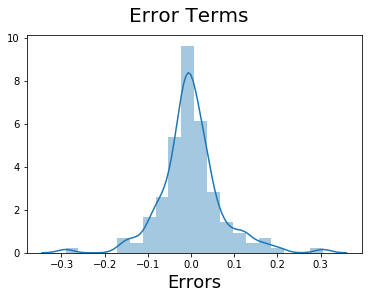

In [258]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Residual Analysis is positive and encouraging. 

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

<b> apply scaling on test set </b>

In [275]:
num_vars = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'curbweight','cylindernumber','carheight'
           ,'enginesize','boreratio','stroke','compressionratio','horsepower', 'peakrpm'
           ,'citympg','highwaympg','price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [276]:
df_test.describe()

symboling  wheelbase  carlength   carwidth  carheight  curbweight  cylindernumber  enginesize  boreratio     stroke  compressionratio  horsepower    peakrpm    citympg  highwaympg      price        gas      turbo        two    hardtop  hatchback      sedan      wagon        fwd        rwd       rear  dohcv          l        ohc       ohcf       ohcv  rotor       2bbl  4bbl        idi        mfi       mpfi       spdi       spfi       audi        bmw      buick  chevrolet      dodge      honda      isuzu  jaguar  maxda      mazda    mercury  mitsubishi     nissan    peugeot   plymouth    porsche  renault       saab     subaru     toyota  volkswagen      volvo
count  62.000000  62.000000  62.000000  62.000000  62.000000   62.000000       62.000000   62.000000  62.000000  62.000000         62.000000   62.000000  62.000000  62.000000   62.000000  62.000000  62.000000  62.000000  62.000000  62.000000  62.000000  62.000000  62.000000  62.000000  62.000000  62.000000   62.0  62.000000  62.000000  62.000000  62.000000   62.0  62.000000  62.0  62.000000  62.000000  62.000000  62.000000  62.000000  62.000000  62.000000  62.000000       62.0  62.000000  62.000000  62.000000    62.0   62.0  62.000000  62.000000   62.000000  62.000000  62.000000  62.000000  62.000000     62.0  62.000000  62.000000  62.000000   62.000000  62.000000
mean    0.583871   0.437764   0.559481   0.480376   0.559663    0.428470        0.232258    0.265673   0.556580   0.544314          0.209375    0.248858   0.393351   0.328405    0.363993   0.239439   0.887097   0.177419   0.435484   0.080645   0.338710   0.451613   0.096774   0.564516   0.419355   0.032258    0.0   0.048387   0.806452   0.048387   0.064516    0.0   0.258065   0.0   0.112903   0.016129   0.500000   0.048387   0.016129   0.032258   0.032258   0.048387        0.0   0.048387   0.064516   0.016129     0.0    0.0   0.064516   0.016129    0.064516   0.064516   0.048387   0.048387   0.032258      0.0   0.048387   0.016129   0.193548    0.080645   0.080645
std     0.271724   0.212861   0.189947   0.165440   0.215811    0.179488        0.088288    0.162820   0.228484   0.160738          0.273690    0.163376   0.192092   0.172009    0.181845   0.233076   0.319058   0.385142   0.499868   0.274512   0.477134   0.501716   0.298064   0.499868   0.497482   0.178127    0.0   0.216335   0.398304   0.216335   0.247676    0.0   0.441142   0.0   0.319058   0.127000   0.504082   0.216335   0.127000   0.178127   0.178127   0.216335        0.0   0.216335   0.247676   0.127000     0.0    0.0   0.247676   0.127000    0.247676   0.247676   0.216335   0.216335   0.178127      0.0   0.216335   0.127000   0.398304    0.274512   0.274512
min     0.000000   0.000000   0.056911   0.183333   0.141593    0.128394        0.200000    0.067925  -0.111111  -0.060606          0.000000    0.016667   0.000000   0.027778   -0.027027   0.007763   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000    0.0   0.000000   0.000000   0.000000   0.000000    0.0   0.000000   0.0   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000        0.0   0.000000   0.000000   0.000000     0.0    0.0   0.000000   0.000000    0.000000   0.000000   0.000000   0.000000   0.000000      0.0   0.000000   0.000000   0.000000    0.000000   0.000000
25%     0.400000   0.313793   0.459350   0.358333   0.384956    0.305275        0.200000    0.177358   0.404762   0.484848          0.093750    0.107292   0.265306   0.166667    0.216216   0.092342   1.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000    0.0   0.000000   1.000000   0.000000   0.000000    0.0   0.000000   0.0   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000        0.0   0.000000   0.000000   0.000000     0.0    0.0   0.000000   0.000000    0.000000   0.000000   0.000000   0.000000   0.000000      0.0   0.000000   0.000000   0

#### Dividing into X_test and y_test

In [277]:
y_test = df_test.pop('price')
X_test = df_test

In [297]:
# Adding constant variable to test dataframe
X_test_m6 = sm.add_constant(X_test)

In [290]:
X_train.columns 

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'gas', 'turbo', 'two', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'rear', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'maxda', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype='object')

In [295]:
list(set(X_train).difference(set(X.columns)))

['mercury',
 'spfi',
 'chevrolet',
 'jaguar',
 'dodge',
 'isuzu',
 'carwidth',
 'peugeot',
 'buick',
 'subaru',
 'mfi',
 'mpfi',
 'highwaympg',
 'mitsubishi',
 'symboling',
 'porsche',
 'idi',
 '2bbl',
 'plymouth',
 'carheight',
 'honda',
 'cylindernumber',
 'gas',
 'curbweight',
 'horsepower',
 'boreratio',
 'maxda',
 'audi',
 'compressionratio',
 'toyota',
 'fwd',
 'mazda',
 'citympg',
 '4bbl',
 'bmw',
 'wheelbase',
 'carlength',
 'saab',
 'volvo',
 'volkswagen',
 'two',
 'nissan',
 'renault',
 'l']

In [300]:
X_test_m6.columns

Index(['const', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'gas', 'turbo', 'two', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'rear', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'maxda', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype='object')

In [303]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4
X_test_m6 = X_test_m6.drop(['mercury','spfi','chevrolet','jaguar','dodge', 'isuzu','carwidth','peugeot', 'buick', 'subaru'
                            ,'mfi', 'mpfi', 'highwaympg', 'mitsubishi', 'symboling', 'porsche', 'idi', '2bbl', 'plymouth'
                            ,'carheight', 'honda', 'cylindernumber','gas','curbweight','horsepower','boreratio'
                            ,'maxda','audi','compressionratio', 'toyota', 'fwd','mazda','citympg','4bbl','bmw'
                            ,'wheelbase','carlength','saab','volvo','volkswagen',  'two', 'nissan', 'renault','l'], axis=1)

In [304]:
y_pred_m6 = lr_6.predict(X_test_m6)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

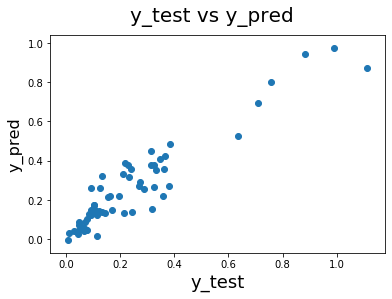

In [306]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m6)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

Overall we have a decent model, but we also acknowledge that we could do better.

We have a couple of options:

Remove more variables that have higher VIF. And document the findings so that car manucturer is aware of these correlations. 
Add new features 
Build a non-linear model